# Proprocessing dataset

In [2]:
import pandas as pd
import datasets
from datasets import load_dataset, Dataset, DatasetDict

Qdata_frame = pd.read_csv('../dataset/train3_v3.csv')


c:\Users\user\Desktop\QuestionQuestionModel\venv\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
Qdata_frame['topic'] = Qdata_frame['topic'].apply(lambda x: x.strip().split(', '))

In [5]:
class_dict = {
'Algorithm Design': "Algorithm Design", 
'Communication Software and Protocols': "Networking and Internet Basics", 
'Computer System': "Computer System", 
'Data Manipulation and Analysis': "Data Manipulation and Analysis", 
'Data Organisation and Data Control': "Data Organisation and Data Control", 
'Database': "Data Manipulation and Analysis", 
'Elementary Web Authoring': "Elementary Web Authoring", 
'Health and Ethical Issues': "Health and Ethical Issues", 
'Input and Output Devices': "Basic Machine Organisation", 
'Intellectual Property': "Intellectual Property", 
'Internet Services and Applications': "Internet Services and Applications", 
'Introduction to HTML': "Elementary Web Authoring", 
'Introduction to Information Processing': "Information Processing", 
'Multimedia Elements': "Multimedia Elements", 
'Number System': "Data Organisation and Data Control", 
'Problem- Formulation and Analysis': "Program Development", 
'Program Development': "Program Development", 
'Program Testing and Debugging': "Program Development", 
'Secondary Storage Devices': "Basic Machine Organisation", 
'Spreadsheet': "Data Manipulation and Analysis", 
'System Software': "Computer System", 
'Networking and Internet Basics': 'Networking and Internet Basics',
'System Unit of a Computer System': "Basic Machine Organisation", 
'The Networking and Internet Basics': "Networking and Internet Basics", 
'Threats and Security on the Internet': "Threats and Security on the Internet", 
'Word Presentation': "Data Manipulation and Analysis"}

In [6]:
Qdata_frame['newTopic'] = Qdata_frame['topic'].apply(lambda topics: [class_dict[topic] for topic in topics])

In [7]:
Qdata_frame

,id,String,topic,type,newTopic
0,1,Which of the following are components of an in...,[Introduction to Information Processing],MC,[Information Processing]
1,2,Which of the following is an example of data c...,[Introduction to Information Processing],MC,[Information Processing]
2,3,Which of the following personnels is responsib...,[Introduction to Information Processing],MC,[Information Processing]
3,4,Which of the following is not a valid way to i...,[Introduction to Information Processing],MC,[Information Processing]
4,5,Which of the following is/are (a) method(s) of...,[Data Organisation and Data Control],MC,[Data Organisation and Data Control]
...,...,...,...,...,...
433,434,When placing a table in a web which of the fol...,[Introduction to HTML],MC,[Elementary Web Authoring]
434,435,A simple web page is shown below. Which ofthe ...,[Introduction to HTML],MC,[Elementary Web Authoring]
435,436,Betty buys a voice recognition dictionary mobi...,[Input and Output Devices],MC,[Basic Machine Organisation]
436,437,Study the following web page:. Which of the fo...,[Introduction to HTML],MC,[Elementary Web Authoring]


In [8]:
# labelling
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()
Qdf = Qdata_frame.join(pd.DataFrame(mlb.fit_transform(Qdata_frame['newTopic']), columns=mlb.classes_))

In [41]:
Qdf.to_csv(r'../dataset/train3_clean_v3.csv')

In [39]:
Qdata_Cleanframe = pd.read_csv('../dataset/train3_clean_v3.csv')

In [40]:
max(Qdata_Cleanframe['String'].map(lambda x: len(x.split(' '))))

63

In [87]:
# split the train, test, and validation data
import sklearn
from sklearn.model_selection import train_test_split

Qdf_train, Qdf_remain = train_test_split(Qdata_Cleanframe, train_size=0.8, shuffle=True)
Qdf_valid, Qdf_test = train_test_split(Qdf_remain, test_size=0.5, shuffle=True)

In [45]:
Qdf_train.shape

(350, 20)

In [46]:
Qdf_test.shape

(44, 20)

In [47]:
Qdf_valid.shape

(44, 20)

In [88]:
# change to hugging face dataset type
trainDS = Dataset.from_pandas(Qdf_train)
validDS = Dataset.from_pandas(Qdf_valid)
testDS = Dataset.from_pandas(Qdf_test)
ds = DatasetDict()
ds["train"] = trainDS
ds["valid"] = validDS
ds["test"] = testDS

labels_original = [label for label in ds['train'].features.keys() if label not in ['Unnamed: 0', 'String', '__index_level_0__']]

In [89]:
Qdata_Cleanframe2 = Qdata_Cleanframe
Qdata_Cleanframe2[labels_original].drop(["id", "type", "topic", "newTopic"], axis=1).sum().sort_values()

Elementary Web Authoring                13
Information Processing                  15
Health and Ethical Issues               18
Intellectual Property                   18
Internet Services and Applications      19
Computer System                         21
Multimedia Elements                     24
Threats and Security on the Internet    34
Networking and Internet Basics          40
Data Organisation and Data Control      47
Algorithm Design                        48
Program Development                     48
Basic Machine Organisation              56
Data Manipulation and Analysis          83
dtype: int64

In [90]:
Qdf_train[labels_original].drop(["id", "type", "topic", "newTopic"], axis=1).sum().sort_values()

Information Processing                   9
Elementary Web Authoring                11
Intellectual Property                   12
Internet Services and Applications      12
Computer System                         15
Health and Ethical Issues               15
Multimedia Elements                     19
Threats and Security on the Internet    29
Networking and Internet Basics          33
Data Organisation and Data Control      39
Algorithm Design                        41
Program Development                     41
Basic Machine Organisation              49
Data Manipulation and Analysis          64
dtype: int64

<AxesSubplot: >

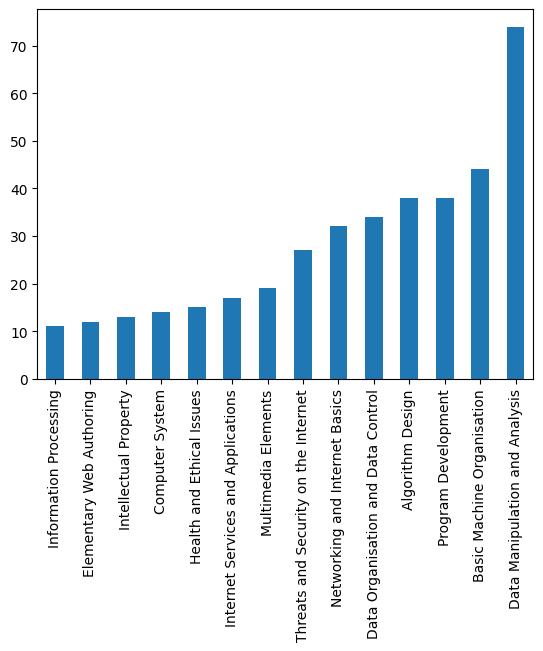

In [46]:
Qdf_train[labels_original].drop(["id", "type", "topic", "newTopic"], axis=1).sum().sort_values().plot.bar()

<AxesSubplot: >

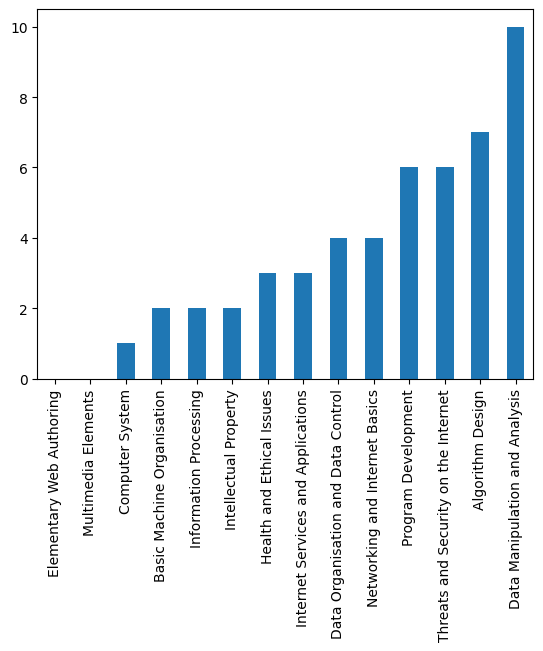

In [64]:
Qdf_valid[labels_original].drop(["id", "type", "topic", "newTopic"], axis=1).sum().sort_values().plot.bar()

In [91]:
Qdf_valid[labels_original].drop(["id", "type", "topic", "newTopic"], axis=1).sum().sort_values()

Information Processing                  0
Elementary Web Authoring                1
Program Development                     1
Algorithm Design                        2
Data Organisation and Data Control      2
Health and Ethical Issues               2
Multimedia Elements                     2
Threats and Security on the Internet    2
Computer System                         4
Basic Machine Organisation              5
Intellectual Property                   5
Internet Services and Applications      5
Networking and Internet Basics          7
Data Manipulation and Analysis          9
dtype: int64

<AxesSubplot: >

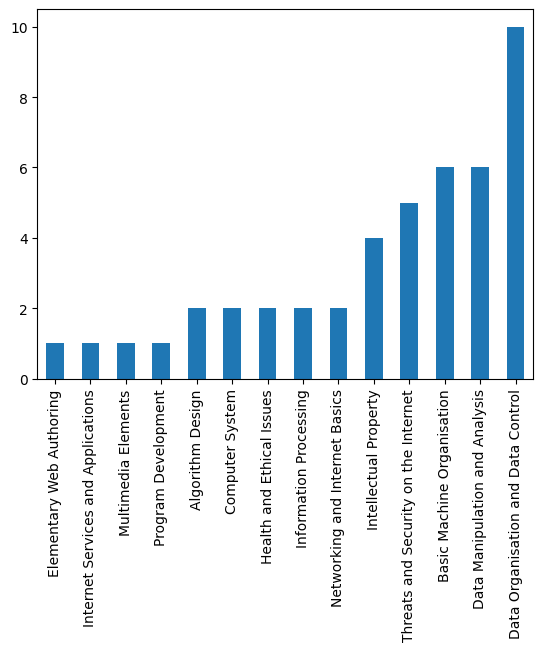

In [73]:
Qdf_test[labels_original].drop(["id", "type", "topic", "newTopic"], axis=1).sum().sort_values().plot.bar()

In [92]:
Qdf_test[labels_original].drop(["id", "type", "topic", "newTopic"], axis=1).sum().sort_values()

Networking and Internet Basics           0
Elementary Web Authoring                 1
Health and Ethical Issues                1
Intellectual Property                    1
Basic Machine Organisation               2
Computer System                          2
Internet Services and Applications       2
Multimedia Elements                      3
Threats and Security on the Internet     3
Algorithm Design                         5
Data Organisation and Data Control       6
Information Processing                   6
Program Development                      6
Data Manipulation and Analysis          10
dtype: int64

In [30]:
#  clear not used columns
columns = ds.column_names
columns_toRemove = ["id", "type", "topic", "newTopic"]
new_ds = ds.remove_columns(columns_toRemove)
print(new_ds)


DatasetDict({
    train: Dataset({
        features: ['Unnamed: 0', 'String', 'Algorithm Design', 'Basic Machine Organisation', 'Computer System', 'Data Manipulation and Analysis', 'Data Organisation and Data Control', 'Elementary Web Authoring', 'Health and Ethical Issues', 'Information Processing', 'Intellectual Property', 'Internet Services and Applications', 'Multimedia Elements', 'Networking and Internet Basics', 'Program Development', 'Threats and Security on the Internet', '__index_level_0__'],
        num_rows: 350
    })
    valid: Dataset({
        features: ['Unnamed: 0', 'String', 'Algorithm Design', 'Basic Machine Organisation', 'Computer System', 'Data Manipulation and Analysis', 'Data Organisation and Data Control', 'Elementary Web Authoring', 'Health and Ethical Issues', 'Information Processing', 'Intellectual Property', 'Internet Services and Applications', 'Multimedia Elements', 'Networking and Internet Basics', 'Program Development', 'Threats and Security on the Inte

In [31]:
labels_original = [label for label in new_ds['train'].features.keys() if label not in ['Unnamed: 0', 'String', '__index_level_0__']]

In [32]:
labels_original

['Algorithm Design',
 'Basic Machine Organisation',
 'Computer System',
 'Data Manipulation and Analysis',
 'Data Organisation and Data Control',
 'Elementary Web Authoring',
 'Health and Ethical Issues',
 'Information Processing',
 'Intellectual Property',
 'Internet Services and Applications',
 'Multimedia Elements',
 'Networking and Internet Basics',
 'Program Development',
 'Threats and Security on the Internet']

In [33]:
# extract the labels
labels_original
id2label = {idx:label for idx, label in enumerate(labels_original)}
label2id = {label:idx for idx, label in enumerate(labels_original)}

In [34]:
labels_original

['Algorithm Design',
 'Basic Machine Organisation',
 'Computer System',
 'Data Manipulation and Analysis',
 'Data Organisation and Data Control',
 'Elementary Web Authoring',
 'Health and Ethical Issues',
 'Information Processing',
 'Intellectual Property',
 'Internet Services and Applications',
 'Multimedia Elements',
 'Networking and Internet Basics',
 'Program Development',
 'Threats and Security on the Internet']

<AxesSubplot: >

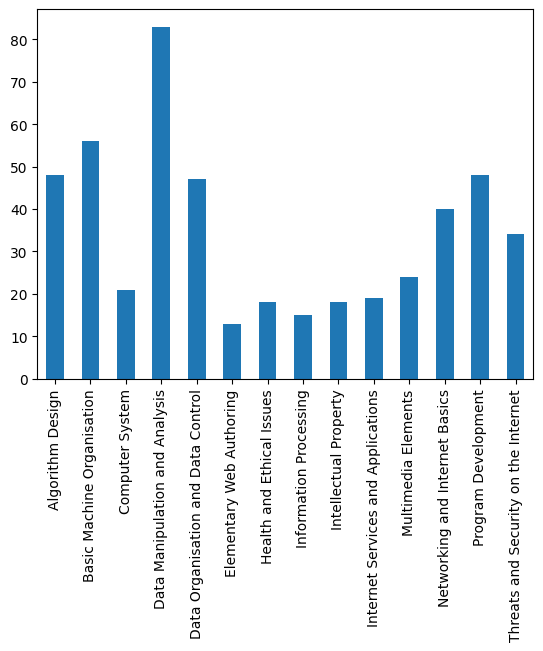

In [130]:
import matplotlib.pyplot as plt
Qdata_Cleanframe[labels_original].sum().plot.bar()

In [35]:
new_ds.save_to_disk('./encoded_data2_better')

In [69]:
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification
import numpy as np

tokenizer = DistilBertTokenizer.from_pretrained("distilbert-base-uncased")

c:\Users\user\Desktop\QuestionQuestionModel\venv\lib\site-packages\huggingface_hub\file_download.py:129: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\user\.cache\huggingface\hub. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


In [70]:
def encode_data(dataset):
    text = dataset["String"]
    # tokenize string
    encoding = tokenizer(text, padding="max_length", truncation=True, max_length=70)
    # create encoded array list with labels
    labelsBatch = {x: dataset[x] for x in dataset.keys() if x in labels_original}
    labels_matrix = np.zeros((len(text), len(labels_original)))
    for idx, label in enumerate(labels_original):
        labels_matrix[:, idx] = labelsBatch[label]
    
    encoding["labels"] = labels_matrix.tolist()
    return encoding

In [71]:
encoded_ds = new_ds.map(encode_data, batched=True, remove_columns=new_ds['train'].column_names)
encoded_ds['train'][0]
encoded_ds['train'][0].keys()

100%|██████████| 1/1 [00:00<00:00, 58.98ba/s]


dict_keys(['input_ids', 'attention_mask', 'labels'])

In [72]:
encoded_ds['train']['input_ids'][0]

[101,
 2577,
 2003,
 1037,
 5597,
 3836,
 1012,
 2002,
 2003,
 4526,
 1037,
 8312,
 5371,
 2005,
 2010,
 2493,
 1012,
 2002,
 9909,
 1037,
 23760,
 4957,
 2000,
 1037,
 7358,
 1010,
 2029,
 6971,
 2000,
 2070,
 3176,
 4475,
 1012,
 2029,
 1997,
 1996,
 2206,
 7047,
 2064,
 2022,
 5799,
 1996,
 2014,
 4957,
 1029,
 102,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [73]:
[id2label[idx] for idx, label in enumerate(encoded_ds['train'][15]['labels']) if label == 1.0]

['Health and Ethical Issues']

In [74]:
encoded_ds.save_to_disk('./encoded_data')

In [ ]:
# datasets.load_from_disk("./encoded_data")

# Model training

In [20]:
# TODO:  tokenize text, feature extraction, multilabel classification
import torch
from torch import cuda
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Using device:', device)
print()

encoded_ds.set_format("torch")

Using device: cuda



In [34]:
from transformers import AutoModelForSequenceClassification, AutoModel
# define model
model = AutoModelForSequenceClassification.from_pretrained("bert-base-uncased", problem_type="multi_label_classification", num_labels=len(labels), id2label=id2label, label2id=label2id)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.dense.weight', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

In [35]:
# train model
batch_size = 8
metric_name = "f1"

In [36]:
from transformers import TrainingArguments, Trainer

args = TrainingArguments(
    f"nbroad/ESG-BERT",
    evaluation_strategy = "epoch",
    save_strategy = "epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=batch_size,
    per_device_eval_batch_size=batch_size,
    num_train_epochs= 30,
    weight_decay=0.01,
    load_best_model_at_end=True,
    metric_for_best_model=metric_name,
)

In [38]:
from sklearn.metrics import f1_score, roc_auc_score, accuracy_score
from transformers import EvalPrediction
    
def multi_label_metrics(predictions, labels, threshold=0.5):
    # apply sigmoid on predictions fitting (batch_size, num_labels)
    sigmoid = torch.nn.Sigmoid()
    probs = sigmoid(torch.Tensor(predictions))
    # use threshold to turn them into integer predictions
    y_pred = np.zeros(probs.shape)
    y_pred[np.where(probs >= threshold)] = 1
    # compute metrics
    y_true = labels
    f1_micro_average = f1_score(y_true=y_true, y_pred=y_pred, average='micro')
    roc_auc = roc_auc_score(y_true, y_pred, average = 'micro')
    accuracy = accuracy_score(y_true, y_pred)
    # return as dictionary
    metrics = {'f1': f1_micro_average,
               'roc_auc': roc_auc,
               'accuracy': accuracy}
    return metrics

def compute_metrics(p: EvalPrediction):
    preds = p.predictions[0] if isinstance(p.predictions, 
            tuple) else p.predictions
    result = multi_label_metrics(
        predictions=preds, 
        labels=p.label_ids)
    return result

In [39]:
encoded_ds['train'][0]['labels'].type()

'torch.FloatTensor'

In [40]:
encoded_ds['train']['input_ids'][0]

tensor([  101,  4480,  2064,  2338,  2005, 12436, 14693,  9323,  2083,  1037,
         4773,  2609,  1012,  4480,  2064,  7276,  1996,  2335, 10994,  2005,
         1996, 21725,  2027,  2215,  2008,  2145,  2031, 20563,  2015,  1012,
         2029,  1997,  1996,  2206, 11583,  1997,  3169,  2190,  6235,  2023,
         2291,  1029,   102,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0])

In [41]:
#forward pass
outputs = model(input_ids=encoded_ds['train']['input_ids'][0].unsqueeze(0), labels=encoded_ds['train'][0]['labels'].unsqueeze(0))
outputs

SequenceClassifierOutput(loss=tensor(0.6724, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>), logits=tensor([[-0.3612,  0.2631,  0.4374, -0.0700,  0.7228,  0.1198, -0.3052, -0.1301,
          0.0266,  0.2273,  0.2286, -0.5257,  0.1255, -0.0676, -0.0962, -0.1973,
          0.0611, -0.4574, -0.5786, -0.2036, -0.1694,  0.2730, -0.1104,  0.2453,
         -0.1880]], grad_fn=<AddmmBackward0>), hidden_states=None, attentions=None)

In [42]:
trainer = Trainer(
    model,
    args,
    train_dataset=encoded_ds["train"],
    eval_dataset=encoded_ds["valid"],
    tokenizer=tokenizer,
    compute_metrics=compute_metrics
)

In [43]:
trainer.train()

c:\Users\user\Desktop\QuestionQuestionModel\venv\lib\site-packages\transformers\optimization.py:306: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
***** Running training *****
  Num examples = 342
  Num Epochs = 30
  Instantaneous batch size per device = 8
  Total train batch size (w. parallel, distributed & accumulation) = 8
  Gradient Accumulation steps = 1
  Total optimization steps = 1290
  Number of trainable parameters = 109501465
  3%|▎         | 43/1290 [00:07<01:46, 11.69it/s] ***** Running Evaluation *****
  Num examples = 43
  Batch size = 8
                                                 
  3%|▎         | 43/1290 [00:07<01:46, 11.69it/s]Saving model checkpoint to nbroad/ESG-BERT\checkpoint-43
Configuration saved in nbroad/ESG-BERT\checkpoint-43\config.json


{'eval_loss': 0.34994110465049744, 'eval_f1': 0.0, 'eval_roc_auc': 0.5, 'eval_accuracy': 0.0, 'eval_runtime': 0.1363, 'eval_samples_per_second': 315.442, 'eval_steps_per_second': 44.015, 'epoch': 1.0}


Model weights saved in nbroad/ESG-BERT\checkpoint-43\pytorch_model.bin
tokenizer config file saved in nbroad/ESG-BERT\checkpoint-43\tokenizer_config.json
Special tokens file saved in nbroad/ESG-BERT\checkpoint-43\special_tokens_map.json
  7%|▋         | 85/1290 [00:12<01:42, 11.71it/s]***** Running Evaluation *****
  Num examples = 43
  Batch size = 8
                                                 
  7%|▋         | 86/1290 [00:12<01:42, 11.71it/s]Saving model checkpoint to nbroad/ESG-BERT\checkpoint-86
Configuration saved in nbroad/ESG-BERT\checkpoint-86\config.json


{'eval_loss': 0.24263913929462433, 'eval_f1': 0.0, 'eval_roc_auc': 0.5, 'eval_accuracy': 0.0, 'eval_runtime': 0.1297, 'eval_samples_per_second': 331.573, 'eval_steps_per_second': 46.266, 'epoch': 2.0}


Model weights saved in nbroad/ESG-BERT\checkpoint-86\pytorch_model.bin
tokenizer config file saved in nbroad/ESG-BERT\checkpoint-86\tokenizer_config.json
Special tokens file saved in nbroad/ESG-BERT\checkpoint-86\special_tokens_map.json
 10%|█         | 129/1290 [00:18<01:37, 11.96it/s]***** Running Evaluation *****
  Num examples = 43
  Batch size = 8
                                                  
 10%|█         | 129/1290 [00:18<01:37, 11.96it/s]Saving model checkpoint to nbroad/ESG-BERT\checkpoint-129
Configuration saved in nbroad/ESG-BERT\checkpoint-129\config.json


{'eval_loss': 0.2065877914428711, 'eval_f1': 0.0, 'eval_roc_auc': 0.5, 'eval_accuracy': 0.0, 'eval_runtime': 0.1238, 'eval_samples_per_second': 347.408, 'eval_steps_per_second': 48.476, 'epoch': 3.0}


Model weights saved in nbroad/ESG-BERT\checkpoint-129\pytorch_model.bin
tokenizer config file saved in nbroad/ESG-BERT\checkpoint-129\tokenizer_config.json
Special tokens file saved in nbroad/ESG-BERT\checkpoint-129\special_tokens_map.json
 13%|█▎        | 171/1290 [00:23<01:34, 11.81it/s]***** Running Evaluation *****
  Num examples = 43
  Batch size = 8
                                                  
 13%|█▎        | 172/1290 [00:23<01:34, 11.81it/s]Saving model checkpoint to nbroad/ESG-BERT\checkpoint-172
Configuration saved in nbroad/ESG-BERT\checkpoint-172\config.json


{'eval_loss': 0.19196200370788574, 'eval_f1': 0.0, 'eval_roc_auc': 0.5, 'eval_accuracy': 0.0, 'eval_runtime': 0.1271, 'eval_samples_per_second': 338.348, 'eval_steps_per_second': 47.211, 'epoch': 4.0}


Model weights saved in nbroad/ESG-BERT\checkpoint-172\pytorch_model.bin
tokenizer config file saved in nbroad/ESG-BERT\checkpoint-172\tokenizer_config.json
Special tokens file saved in nbroad/ESG-BERT\checkpoint-172\special_tokens_map.json
 17%|█▋        | 215/1290 [00:28<01:32, 11.58it/s]***** Running Evaluation *****
  Num examples = 43
  Batch size = 8
                                                  
 17%|█▋        | 215/1290 [00:28<01:32, 11.58it/s]Saving model checkpoint to nbroad/ESG-BERT\checkpoint-215
Configuration saved in nbroad/ESG-BERT\checkpoint-215\config.json


{'eval_loss': 0.1838485151529312, 'eval_f1': 0.0, 'eval_roc_auc': 0.5, 'eval_accuracy': 0.0, 'eval_runtime': 0.1277, 'eval_samples_per_second': 336.658, 'eval_steps_per_second': 46.976, 'epoch': 5.0}


Model weights saved in nbroad/ESG-BERT\checkpoint-215\pytorch_model.bin
tokenizer config file saved in nbroad/ESG-BERT\checkpoint-215\tokenizer_config.json
Special tokens file saved in nbroad/ESG-BERT\checkpoint-215\special_tokens_map.json
 20%|█▉        | 257/1290 [00:34<01:28, 11.66it/s]***** Running Evaluation *****
  Num examples = 43
  Batch size = 8
                                                  
 20%|██        | 258/1290 [00:34<01:28, 11.66it/s]Saving model checkpoint to nbroad/ESG-BERT\checkpoint-258
Configuration saved in nbroad/ESG-BERT\checkpoint-258\config.json


{'eval_loss': 0.17599597573280334, 'eval_f1': 0.0, 'eval_roc_auc': 0.5, 'eval_accuracy': 0.0, 'eval_runtime': 0.1245, 'eval_samples_per_second': 345.393, 'eval_steps_per_second': 48.194, 'epoch': 6.0}


Model weights saved in nbroad/ESG-BERT\checkpoint-258\pytorch_model.bin
tokenizer config file saved in nbroad/ESG-BERT\checkpoint-258\tokenizer_config.json
Special tokens file saved in nbroad/ESG-BERT\checkpoint-258\special_tokens_map.json
 23%|██▎       | 300/1290 [00:40<01:23, 11.80it/s]***** Running Evaluation *****
  Num examples = 43
  Batch size = 8
                                                  
 23%|██▎       | 301/1290 [00:41<01:23, 11.80it/s]Saving model checkpoint to nbroad/ESG-BERT\checkpoint-301
Configuration saved in nbroad/ESG-BERT\checkpoint-301\config.json


{'eval_loss': 0.16920821368694305, 'eval_f1': 0.0, 'eval_roc_auc': 0.5, 'eval_accuracy': 0.0, 'eval_runtime': 0.1242, 'eval_samples_per_second': 346.172, 'eval_steps_per_second': 48.303, 'epoch': 7.0}


Model weights saved in nbroad/ESG-BERT\checkpoint-301\pytorch_model.bin
tokenizer config file saved in nbroad/ESG-BERT\checkpoint-301\tokenizer_config.json
Special tokens file saved in nbroad/ESG-BERT\checkpoint-301\special_tokens_map.json
 27%|██▋       | 344/1290 [00:46<01:19, 11.97it/s]***** Running Evaluation *****
  Num examples = 43
  Batch size = 8
                                                  
 27%|██▋       | 344/1290 [00:46<01:19, 11.97it/s]Saving model checkpoint to nbroad/ESG-BERT\checkpoint-344
Configuration saved in nbroad/ESG-BERT\checkpoint-344\config.json


{'eval_loss': 0.16141127049922943, 'eval_f1': 0.0, 'eval_roc_auc': 0.5, 'eval_accuracy': 0.0, 'eval_runtime': 0.1252, 'eval_samples_per_second': 343.45, 'eval_steps_per_second': 47.923, 'epoch': 8.0}


Model weights saved in nbroad/ESG-BERT\checkpoint-344\pytorch_model.bin
tokenizer config file saved in nbroad/ESG-BERT\checkpoint-344\tokenizer_config.json
Special tokens file saved in nbroad/ESG-BERT\checkpoint-344\special_tokens_map.json
 30%|██▉       | 386/1290 [00:51<01:16, 11.75it/s]***** Running Evaluation *****
  Num examples = 43
  Batch size = 8
                                                  
 30%|███       | 387/1290 [00:51<01:16, 11.75it/s]Saving model checkpoint to nbroad/ESG-BERT\checkpoint-387
Configuration saved in nbroad/ESG-BERT\checkpoint-387\config.json


{'eval_loss': 0.15483927726745605, 'eval_f1': 0.3, 'eval_roc_auc': 0.5882352941176471, 'eval_accuracy': 0.06976744186046512, 'eval_runtime': 0.1267, 'eval_samples_per_second': 339.458, 'eval_steps_per_second': 47.366, 'epoch': 9.0}


Model weights saved in nbroad/ESG-BERT\checkpoint-387\pytorch_model.bin
tokenizer config file saved in nbroad/ESG-BERT\checkpoint-387\tokenizer_config.json
Special tokens file saved in nbroad/ESG-BERT\checkpoint-387\special_tokens_map.json
 33%|███▎      | 430/1290 [00:56<01:11, 12.02it/s]***** Running Evaluation *****
  Num examples = 43
  Batch size = 8
                                                  
 33%|███▎      | 430/1290 [00:56<01:11, 12.02it/s]Saving model checkpoint to nbroad/ESG-BERT\checkpoint-430
Configuration saved in nbroad/ESG-BERT\checkpoint-430\config.json


{'eval_loss': 0.14805974066257477, 'eval_f1': 0.3, 'eval_roc_auc': 0.5882352941176471, 'eval_accuracy': 0.06976744186046512, 'eval_runtime': 0.1248, 'eval_samples_per_second': 344.604, 'eval_steps_per_second': 48.084, 'epoch': 10.0}


Model weights saved in nbroad/ESG-BERT\checkpoint-430\pytorch_model.bin
tokenizer config file saved in nbroad/ESG-BERT\checkpoint-430\tokenizer_config.json
Special tokens file saved in nbroad/ESG-BERT\checkpoint-430\special_tokens_map.json
 37%|███▋      | 472/1290 [01:01<01:09, 11.81it/s]***** Running Evaluation *****
  Num examples = 43
  Batch size = 8
                                                  
 37%|███▋      | 473/1290 [01:02<01:09, 11.81it/s]Saving model checkpoint to nbroad/ESG-BERT\checkpoint-473
Configuration saved in nbroad/ESG-BERT\checkpoint-473\config.json


{'eval_loss': 0.14303907752037048, 'eval_f1': 0.24137931034482762, 'eval_roc_auc': 0.5686274509803921, 'eval_accuracy': 0.023255813953488372, 'eval_runtime': 0.1255, 'eval_samples_per_second': 342.735, 'eval_steps_per_second': 47.823, 'epoch': 11.0}


Model weights saved in nbroad/ESG-BERT\checkpoint-473\pytorch_model.bin
tokenizer config file saved in nbroad/ESG-BERT\checkpoint-473\tokenizer_config.json
Special tokens file saved in nbroad/ESG-BERT\checkpoint-473\special_tokens_map.json
 39%|███▉      | 502/1290 [01:06<01:08, 11.47it/s]

{'loss': 0.2099, 'learning_rate': 1.2248062015503876e-05, 'epoch': 11.63}


 40%|████      | 516/1290 [01:07<01:04, 11.95it/s]***** Running Evaluation *****
  Num examples = 43
  Batch size = 8
                                                  
 40%|████      | 516/1290 [01:07<01:04, 11.95it/s]Saving model checkpoint to nbroad/ESG-BERT\checkpoint-516
Configuration saved in nbroad/ESG-BERT\checkpoint-516\config.json


{'eval_loss': 0.13734687864780426, 'eval_f1': 0.39999999999999997, 'eval_roc_auc': 0.6269626991421569, 'eval_accuracy': 0.13953488372093023, 'eval_runtime': 0.1247, 'eval_samples_per_second': 344.886, 'eval_steps_per_second': 48.124, 'epoch': 12.0}


Model weights saved in nbroad/ESG-BERT\checkpoint-516\pytorch_model.bin
tokenizer config file saved in nbroad/ESG-BERT\checkpoint-516\tokenizer_config.json
Special tokens file saved in nbroad/ESG-BERT\checkpoint-516\special_tokens_map.json
 43%|████▎     | 558/1290 [01:12<01:02, 11.63it/s]***** Running Evaluation *****
  Num examples = 43
  Batch size = 8
                                                  
 43%|████▎     | 559/1290 [01:12<01:02, 11.63it/s]Saving model checkpoint to nbroad/ESG-BERT\checkpoint-559
Configuration saved in nbroad/ESG-BERT\checkpoint-559\config.json


{'eval_loss': 0.13374534249305725, 'eval_f1': 0.375, 'eval_roc_auc': 0.6171587775735294, 'eval_accuracy': 0.13953488372093023, 'eval_runtime': 0.1288, 'eval_samples_per_second': 333.747, 'eval_steps_per_second': 46.569, 'epoch': 13.0}


Model weights saved in nbroad/ESG-BERT\checkpoint-559\pytorch_model.bin
tokenizer config file saved in nbroad/ESG-BERT\checkpoint-559\tokenizer_config.json
Special tokens file saved in nbroad/ESG-BERT\checkpoint-559\special_tokens_map.json
 47%|████▋     | 602/1290 [01:18<00:58, 11.82it/s]***** Running Evaluation *****
  Num examples = 43
  Batch size = 8
                                                  
 47%|████▋     | 602/1290 [01:18<00:58, 11.82it/s]Saving model checkpoint to nbroad/ESG-BERT\checkpoint-602
Configuration saved in nbroad/ESG-BERT\checkpoint-602\config.json


{'eval_loss': 0.1291268765926361, 'eval_f1': 0.375, 'eval_roc_auc': 0.6171587775735294, 'eval_accuracy': 0.13953488372093023, 'eval_runtime': 0.1243, 'eval_samples_per_second': 346.006, 'eval_steps_per_second': 48.28, 'epoch': 14.0}


Model weights saved in nbroad/ESG-BERT\checkpoint-602\pytorch_model.bin
tokenizer config file saved in nbroad/ESG-BERT\checkpoint-602\tokenizer_config.json
Special tokens file saved in nbroad/ESG-BERT\checkpoint-602\special_tokens_map.json
 50%|████▉     | 644/1290 [01:23<00:59, 10.82it/s]***** Running Evaluation *****
  Num examples = 43
  Batch size = 8
                                                  
 50%|█████     | 645/1290 [01:24<00:59, 10.82it/s]Saving model checkpoint to nbroad/ESG-BERT\checkpoint-645
Configuration saved in nbroad/ESG-BERT\checkpoint-645\config.json


{'eval_loss': 0.12493478506803513, 'eval_f1': 0.39999999999999997, 'eval_roc_auc': 0.6269626991421569, 'eval_accuracy': 0.13953488372093023, 'eval_runtime': 0.1332, 'eval_samples_per_second': 322.737, 'eval_steps_per_second': 45.033, 'epoch': 15.0}


Model weights saved in nbroad/ESG-BERT\checkpoint-645\pytorch_model.bin
tokenizer config file saved in nbroad/ESG-BERT\checkpoint-645\tokenizer_config.json
Special tokens file saved in nbroad/ESG-BERT\checkpoint-645\special_tokens_map.json
 53%|█████▎    | 688/1290 [01:29<00:50, 11.85it/s]***** Running Evaluation *****
  Num examples = 43
  Batch size = 8
                                                  
 53%|█████▎    | 688/1290 [01:29<00:50, 11.85it/s]Saving model checkpoint to nbroad/ESG-BERT\checkpoint-688
Configuration saved in nbroad/ESG-BERT\checkpoint-688\config.json


{'eval_loss': 0.12262646853923798, 'eval_f1': 0.48571428571428565, 'eval_roc_auc': 0.6656901041666666, 'eval_accuracy': 0.23255813953488372, 'eval_runtime': 0.1332, 'eval_samples_per_second': 322.862, 'eval_steps_per_second': 45.051, 'epoch': 16.0}


Model weights saved in nbroad/ESG-BERT\checkpoint-688\pytorch_model.bin
tokenizer config file saved in nbroad/ESG-BERT\checkpoint-688\tokenizer_config.json
Special tokens file saved in nbroad/ESG-BERT\checkpoint-688\special_tokens_map.json
 57%|█████▋    | 730/1290 [01:34<00:47, 11.67it/s]***** Running Evaluation *****
  Num examples = 43
  Batch size = 8
                                                  
 57%|█████▋    | 731/1290 [01:34<00:47, 11.67it/s]Saving model checkpoint to nbroad/ESG-BERT\checkpoint-731
Configuration saved in nbroad/ESG-BERT\checkpoint-731\config.json


{'eval_loss': 0.11991657316684723, 'eval_f1': 0.547945205479452, 'eval_roc_auc': 0.695101868872549, 'eval_accuracy': 0.3023255813953488, 'eval_runtime': 0.1251, 'eval_samples_per_second': 343.848, 'eval_steps_per_second': 47.979, 'epoch': 17.0}


Model weights saved in nbroad/ESG-BERT\checkpoint-731\pytorch_model.bin
tokenizer config file saved in nbroad/ESG-BERT\checkpoint-731\tokenizer_config.json
Special tokens file saved in nbroad/ESG-BERT\checkpoint-731\special_tokens_map.json
 60%|██████    | 774/1290 [01:39<00:42, 12.01it/s]***** Running Evaluation *****
  Num examples = 43
  Batch size = 8
                                                  
 60%|██████    | 774/1290 [01:40<00:42, 12.01it/s]Saving model checkpoint to nbroad/ESG-BERT\checkpoint-774
Configuration saved in nbroad/ESG-BERT\checkpoint-774\config.json


{'eval_loss': 0.11853792518377304, 'eval_f1': 0.5866666666666666, 'eval_roc_auc': 0.7147097120098039, 'eval_accuracy': 0.3488372093023256, 'eval_runtime': 0.1254, 'eval_samples_per_second': 342.854, 'eval_steps_per_second': 47.84, 'epoch': 18.0}


Model weights saved in nbroad/ESG-BERT\checkpoint-774\pytorch_model.bin
tokenizer config file saved in nbroad/ESG-BERT\checkpoint-774\tokenizer_config.json
Special tokens file saved in nbroad/ESG-BERT\checkpoint-774\special_tokens_map.json
 63%|██████▎   | 816/1290 [01:45<00:40, 11.80it/s]***** Running Evaluation *****
  Num examples = 43
  Batch size = 8
                                                  
 63%|██████▎   | 817/1290 [01:45<00:40, 11.80it/s]Saving model checkpoint to nbroad/ESG-BERT\checkpoint-817
Configuration saved in nbroad/ESG-BERT\checkpoint-817\config.json


{'eval_loss': 0.1149933859705925, 'eval_f1': 0.5675675675675675, 'eval_roc_auc': 0.7049057904411764, 'eval_accuracy': 0.3488372093023256, 'eval_runtime': 0.1242, 'eval_samples_per_second': 346.222, 'eval_steps_per_second': 48.31, 'epoch': 19.0}


Model weights saved in nbroad/ESG-BERT\checkpoint-817\pytorch_model.bin
tokenizer config file saved in nbroad/ESG-BERT\checkpoint-817\tokenizer_config.json
Special tokens file saved in nbroad/ESG-BERT\checkpoint-817\special_tokens_map.json
 67%|██████▋   | 860/1290 [01:50<00:37, 11.58it/s]***** Running Evaluation *****
  Num examples = 43
  Batch size = 8
                                                  
 67%|██████▋   | 860/1290 [01:50<00:37, 11.58it/s]Saving model checkpoint to nbroad/ESG-BERT\checkpoint-860
Configuration saved in nbroad/ESG-BERT\checkpoint-860\config.json


{'eval_loss': 0.11361194401979446, 'eval_f1': 0.5866666666666666, 'eval_roc_auc': 0.7147097120098039, 'eval_accuracy': 0.3488372093023256, 'eval_runtime': 0.1274, 'eval_samples_per_second': 337.467, 'eval_steps_per_second': 47.088, 'epoch': 20.0}


Model weights saved in nbroad/ESG-BERT\checkpoint-860\pytorch_model.bin
tokenizer config file saved in nbroad/ESG-BERT\checkpoint-860\tokenizer_config.json
Special tokens file saved in nbroad/ESG-BERT\checkpoint-860\special_tokens_map.json
 70%|██████▉   | 902/1290 [01:55<00:32, 11.77it/s]***** Running Evaluation *****
  Num examples = 43
  Batch size = 8
                                                  
 70%|███████   | 903/1290 [01:56<00:32, 11.77it/s]Saving model checkpoint to nbroad/ESG-BERT\checkpoint-903
Configuration saved in nbroad/ESG-BERT\checkpoint-903\config.json


{'eval_loss': 0.1126101091504097, 'eval_f1': 0.5866666666666666, 'eval_roc_auc': 0.7147097120098039, 'eval_accuracy': 0.3488372093023256, 'eval_runtime': 0.1478, 'eval_samples_per_second': 290.952, 'eval_steps_per_second': 40.598, 'epoch': 21.0}


Model weights saved in nbroad/ESG-BERT\checkpoint-903\pytorch_model.bin
tokenizer config file saved in nbroad/ESG-BERT\checkpoint-903\tokenizer_config.json
Special tokens file saved in nbroad/ESG-BERT\checkpoint-903\special_tokens_map.json
 73%|███████▎  | 946/1290 [02:01<00:28, 12.01it/s]***** Running Evaluation *****
  Num examples = 43
  Batch size = 8
                                                  
 73%|███████▎  | 946/1290 [02:01<00:28, 12.01it/s]Saving model checkpoint to nbroad/ESG-BERT\checkpoint-946
Configuration saved in nbroad/ESG-BERT\checkpoint-946\config.json


{'eval_loss': 0.11120515316724777, 'eval_f1': 0.6410256410256411, 'eval_roc_auc': 0.7441214767156863, 'eval_accuracy': 0.4186046511627907, 'eval_runtime': 0.1234, 'eval_samples_per_second': 348.473, 'eval_steps_per_second': 48.624, 'epoch': 22.0}


Model weights saved in nbroad/ESG-BERT\checkpoint-946\pytorch_model.bin
tokenizer config file saved in nbroad/ESG-BERT\checkpoint-946\tokenizer_config.json
Special tokens file saved in nbroad/ESG-BERT\checkpoint-946\special_tokens_map.json
 77%|███████▋  | 988/1290 [02:06<00:25, 11.75it/s]***** Running Evaluation *****
  Num examples = 43
  Batch size = 8
                                                  
 77%|███████▋  | 989/1290 [02:06<00:25, 11.75it/s]Saving model checkpoint to nbroad/ESG-BERT\checkpoint-989
Configuration saved in nbroad/ESG-BERT\checkpoint-989\config.json


{'eval_loss': 0.10932711511850357, 'eval_f1': 0.6410256410256411, 'eval_roc_auc': 0.7441214767156863, 'eval_accuracy': 0.4186046511627907, 'eval_runtime': 0.1243, 'eval_samples_per_second': 346.017, 'eval_steps_per_second': 48.281, 'epoch': 23.0}


Model weights saved in nbroad/ESG-BERT\checkpoint-989\pytorch_model.bin
tokenizer config file saved in nbroad/ESG-BERT\checkpoint-989\tokenizer_config.json
Special tokens file saved in nbroad/ESG-BERT\checkpoint-989\special_tokens_map.json
 78%|███████▊  | 1002/1290 [02:24<01:50,  2.61it/s]

{'loss': 0.1079, 'learning_rate': 4.4961240310077525e-06, 'epoch': 23.26}


 80%|████████  | 1032/1290 [02:27<00:21, 11.84it/s]***** Running Evaluation *****
  Num examples = 43
  Batch size = 8
                                                   
 80%|████████  | 1032/1290 [02:27<00:21, 11.84it/s]Saving model checkpoint to nbroad/ESG-BERT\checkpoint-1032
Configuration saved in nbroad/ESG-BERT\checkpoint-1032\config.json


{'eval_loss': 0.1094929650425911, 'eval_f1': 0.6233766233766235, 'eval_roc_auc': 0.7343175551470589, 'eval_accuracy': 0.4186046511627907, 'eval_runtime': 0.1254, 'eval_samples_per_second': 342.813, 'eval_steps_per_second': 47.834, 'epoch': 24.0}


Model weights saved in nbroad/ESG-BERT\checkpoint-1032\pytorch_model.bin
tokenizer config file saved in nbroad/ESG-BERT\checkpoint-1032\tokenizer_config.json
Special tokens file saved in nbroad/ESG-BERT\checkpoint-1032\special_tokens_map.json
 83%|████████▎ | 1074/1290 [02:32<00:18, 11.80it/s]***** Running Evaluation *****
  Num examples = 43
  Batch size = 8
                                                   
 83%|████████▎ | 1075/1290 [02:32<00:18, 11.80it/s]Saving model checkpoint to nbroad/ESG-BERT\checkpoint-1075
Configuration saved in nbroad/ESG-BERT\checkpoint-1075\config.json


{'eval_loss': 0.1084151566028595, 'eval_f1': 0.6410256410256411, 'eval_roc_auc': 0.7441214767156863, 'eval_accuracy': 0.4186046511627907, 'eval_runtime': 0.1248, 'eval_samples_per_second': 344.642, 'eval_steps_per_second': 48.09, 'epoch': 25.0}


Model weights saved in nbroad/ESG-BERT\checkpoint-1075\pytorch_model.bin
tokenizer config file saved in nbroad/ESG-BERT\checkpoint-1075\tokenizer_config.json
Special tokens file saved in nbroad/ESG-BERT\checkpoint-1075\special_tokens_map.json
 87%|████████▋ | 1118/1290 [02:37<00:14, 12.00it/s]***** Running Evaluation *****
  Num examples = 43
  Batch size = 8
                                                   
 87%|████████▋ | 1118/1290 [02:37<00:14, 12.00it/s]Saving model checkpoint to nbroad/ESG-BERT\checkpoint-1118


{'eval_loss': 0.10729937255382538, 'eval_f1': 0.6410256410256411, 'eval_roc_auc': 0.7441214767156863, 'eval_accuracy': 0.4186046511627907, 'eval_runtime': 0.1243, 'eval_samples_per_second': 346.01, 'eval_steps_per_second': 48.28, 'epoch': 26.0}


Configuration saved in nbroad/ESG-BERT\checkpoint-1118\config.json
 87%|████████▋ | 1118/1290 [02:47<00:14, 12.00it/s]Model weights saved in nbroad/ESG-BERT\checkpoint-1118\pytorch_model.bin
tokenizer config file saved in nbroad/ESG-BERT\checkpoint-1118\tokenizer_config.json
Special tokens file saved in nbroad/ESG-BERT\checkpoint-1118\special_tokens_map.json
 90%|█████████ | 1161/1290 [02:55<00:10, 11.87it/s]***** Running Evaluation *****
  Num examples = 43
  Batch size = 8
                                                   
 90%|█████████ | 1161/1290 [02:55<00:10, 11.87it/s]Saving model checkpoint to nbroad/ESG-BERT\checkpoint-1161
Configuration saved in nbroad/ESG-BERT\checkpoint-1161\config.json


{'eval_loss': 0.10700342059135437, 'eval_f1': 0.6052631578947368, 'eval_roc_auc': 0.7245136335784313, 'eval_accuracy': 0.3953488372093023, 'eval_runtime': 0.1232, 'eval_samples_per_second': 348.983, 'eval_steps_per_second': 48.695, 'epoch': 27.0}


Model weights saved in nbroad/ESG-BERT\checkpoint-1161\pytorch_model.bin
tokenizer config file saved in nbroad/ESG-BERT\checkpoint-1161\tokenizer_config.json
Special tokens file saved in nbroad/ESG-BERT\checkpoint-1161\special_tokens_map.json
 93%|█████████▎| 1203/1290 [03:00<00:07, 11.79it/s]***** Running Evaluation *****
  Num examples = 43
  Batch size = 8
                                                   
 93%|█████████▎| 1204/1290 [03:01<00:07, 11.79it/s]Saving model checkpoint to nbroad/ESG-BERT\checkpoint-1204
Configuration saved in nbroad/ESG-BERT\checkpoint-1204\config.json


{'eval_loss': 0.10617008805274963, 'eval_f1': 0.6410256410256411, 'eval_roc_auc': 0.7441214767156863, 'eval_accuracy': 0.4186046511627907, 'eval_runtime': 0.1246, 'eval_samples_per_second': 345.039, 'eval_steps_per_second': 48.145, 'epoch': 28.0}


 93%|█████████▎| 1204/1290 [03:12<00:07, 11.79it/s]Model weights saved in nbroad/ESG-BERT\checkpoint-1204\pytorch_model.bin
tokenizer config file saved in nbroad/ESG-BERT\checkpoint-1204\tokenizer_config.json
Special tokens file saved in nbroad/ESG-BERT\checkpoint-1204\special_tokens_map.json
 97%|█████████▋| 1247/1290 [03:18<00:03, 11.88it/s]***** Running Evaluation *****
  Num examples = 43
  Batch size = 8
                                                   
 97%|█████████▋| 1247/1290 [03:18<00:03, 11.88it/s]Saving model checkpoint to nbroad/ESG-BERT\checkpoint-1247
Configuration saved in nbroad/ESG-BERT\checkpoint-1247\config.json


{'eval_loss': 0.1061098501086235, 'eval_f1': 0.6410256410256411, 'eval_roc_auc': 0.7441214767156863, 'eval_accuracy': 0.4186046511627907, 'eval_runtime': 0.1249, 'eval_samples_per_second': 344.315, 'eval_steps_per_second': 48.044, 'epoch': 29.0}


Model weights saved in nbroad/ESG-BERT\checkpoint-1247\pytorch_model.bin
tokenizer config file saved in nbroad/ESG-BERT\checkpoint-1247\tokenizer_config.json
Special tokens file saved in nbroad/ESG-BERT\checkpoint-1247\special_tokens_map.json
100%|██████████| 1290/1290 [03:37<00:00, 11.85it/s]***** Running Evaluation *****
  Num examples = 43
  Batch size = 8
                                                   
100%|██████████| 1290/1290 [03:37<00:00, 11.85it/s]Saving model checkpoint to nbroad/ESG-BERT\checkpoint-1290
Configuration saved in nbroad/ESG-BERT\checkpoint-1290\config.json


{'eval_loss': 0.10597935318946838, 'eval_f1': 0.6410256410256411, 'eval_roc_auc': 0.7441214767156863, 'eval_accuracy': 0.4186046511627907, 'eval_runtime': 0.1258, 'eval_samples_per_second': 341.929, 'eval_steps_per_second': 47.711, 'epoch': 30.0}


Model weights saved in nbroad/ESG-BERT\checkpoint-1290\pytorch_model.bin
tokenizer config file saved in nbroad/ESG-BERT\checkpoint-1290\tokenizer_config.json
Special tokens file saved in nbroad/ESG-BERT\checkpoint-1290\special_tokens_map.json


Training completed. Do not forget to share your model on huggingface.co/models =)


Loading best model from nbroad/ESG-BERT\checkpoint-946 (score: 0.6410256410256411).
100%|██████████| 1290/1290 [03:39<00:00,  5.87it/s]

{'train_runtime': 219.8928, 'train_samples_per_second': 46.659, 'train_steps_per_second': 5.866, 'train_loss': 0.14222994516062182, 'epoch': 30.0}


TrainOutput(global_step=1290, training_loss=0.14222994516062182, metrics={'train_runtime': 219.8928, 'train_samples_per_second': 46.659, 'train_steps_per_second': 5.866, 'train_loss': 0.14222994516062182, 'epoch': 30.0})

In [44]:
trainer.evaluate()

***** Running Evaluation *****
  Num examples = 43
  Batch size = 8
100%|██████████| 6/6 [00:00<00:00, 61.33it/s]


{'eval_loss': 0.11120515316724777,
 'eval_f1': 0.6410256410256411,
 'eval_roc_auc': 0.7441214767156863,
 'eval_accuracy': 0.4186046511627907,
 'eval_runtime': 0.2372,
 'eval_samples_per_second': 181.266,
 'eval_steps_per_second': 25.293,
 'epoch': 30.0}

In [100]:
# trainer.save_model("./temp_model")

Saving model checkpoint to ./temp_model
Configuration saved in ./temp_model\config.json
Model weights saved in ./temp_model\pytorch_model.bin
tokenizer config file saved in ./temp_model\tokenizer_config.json
Special tokens file saved in ./temp_model\special_tokens_map.json


In [45]:
encoded_ds["test"][0]

{'input_ids': tensor([ 101, 2029, 1997, 1996, 2206, 2024, 6413, 2043, 2478, 1037, 2591, 2865,
         4646, 1029,  102,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0,    0,    0]),
 'token_type_ids': tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 'attention_mask': tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [47]:
trainer.model.device


device(type='cuda', index=0)

In [85]:
test2 = encoded_ds['test']

In [86]:
test2 = test2.with_format("torch",device=device)


In [ ]:
# from torch.utils.data import DataLoader
# test_loader = DataLoader(test2, batch_size=8)

# acc = []
# loop = tqdm(test_loader)
# for batch in loop:
#     with torch.ho_grad():
#         input_ids = batch['input_ids']
#         token_type_ids = batch['token_type_ids']
#         attention_mask = batch['attention_mask']
#         labels = batch['labels']

#         outputs = trainer.model(input_ids, token_type_ids = token_type_ids, attention_mask = attention_mask, labels=labels)
#         loss = outputs[0]
#         loss.backward()
#         optim.step()

#         loop.set_descriptions(f'Epoch {epoch}')
#         loop.set_postfix(loss = loss.item())



In [115]:
text = "When creating a database table in database software, what should users usually set?"

encoding = tokenizer(text, return_tensors="pt")
encoding = {k: v.to(trainer.model.device) for k,v in encoding.items()}

outputs = trainer.model(**encoding)

In [116]:
logits = outputs.logits
logits.shape

torch.Size([1, 25])

In [117]:
sigmoid = torch.nn.Sigmoid()
probs = sigmoid(logits.squeeze().cpu())
predictions = np.zeros(probs.shape)
predictions[np.where(probs >= 0.5)] = 1
# turn predicted id's into actual label names
predicted_labels = [id2label[idx] for idx, label in enumerate(predictions) if label == 1.0]
print(predicted_labels)

['Database']


In [123]:
predictions = trainer.predict(encoded_ds['test'])

***** Running Prediction *****
  Num examples = 43
  Batch size = 8
100%|██████████| 6/6 [00:00<00:00, 58.81it/s]


In [134]:
print(predictions.predictions)

[[-3.7618997 -2.9189916 -2.913126  ... -2.962478  -2.6815667 -3.3390715]
 [-2.7135108 -3.2827024 -3.6933084 ... -3.252916  -3.3481479 -2.7850587]
 [-0.7024888 -3.9971478 -3.7749178 ... -3.8887842 -3.465865  -3.984353 ]
 ...
 [-3.8829486 -3.4575887 -3.0203755 ... -3.0978239 -3.457069  -3.3682363]
 [ 1.6844727 -3.241483  -3.215388  ... -2.6664422 -2.3518958 -3.8822513]
 [-2.7291753 -3.064532  -3.40631   ... -3.595975  -3.2936034 -2.8933134]]


In [130]:

print(predictions.metrics)

{'test_loss': 0.11980658024549484, 'test_f1': 0.36065573770491804, 'test_roc_auc': 0.6176215827946085, 'test_accuracy': 0.16279069767441862, 'test_runtime': 0.2729, 'test_samples_per_second': 157.556, 'test_steps_per_second': 21.985}


In [135]:
model.save_pretrained("./Bert-model-v1")

Configuration saved in ./Bert-model-v1\config.json
Model weights saved in ./Bert-model-v1\pytorch_model.bin


In [137]:
trainer.evaluate(encoded_ds['test'])

***** Running Evaluation *****
  Num examples = 43
  Batch size = 8
100%|██████████| 6/6 [00:00<00:00, 52.42it/s]


{'eval_loss': 0.11980658024549484,
 'eval_f1': 0.36065573770491804,
 'eval_roc_auc': 0.6176215827946085,
 'eval_accuracy': 0.16279069767441862,
 'eval_runtime': 0.3234,
 'eval_samples_per_second': 132.956,
 'eval_steps_per_second': 18.552,
 'epoch': 30.0}

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

# Training model 2